In [69]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#read the dataset from csv file
df=pd.read_csv("RideDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [71]:
#understanding th columns/features and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [72]:
#understanding number of datapoints
df.shape

(1156, 7)

Data Preprocessing


In [73]:
#Step 1: changing the Nan values in 'Purpose' column to Not Available
df['PURPOSE'].fillna('Not Available', inplace=True)

<ipython-input-73-5b578f18ba4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Not Available', inplace=True)


In [74]:
df.head(24)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [75]:
#Step 2: Change the format of start_date and end_date to date from object
# one thing to notice is the format of the dates is either mm-dd-yyyy or mm/dd/yyyy
# if mm>12 or dd>31 then all these dates will be replaced by NaT
from datetime import datetime

def parse_mixed_date(date_str):
    for fmt in ('%m-%d-%Y %H:%M', '%m/%d/%Y %H:%M'):
        try:
            return datetime.strptime(str(date_str), fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT

df['START_DATE'] = df['START_DATE'].apply(parse_mixed_date)
df['END_DATE'] = df['END_DATE'].apply(parse_mixed_date)


In [76]:
df.info()
df[df['START_DATE'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,NaT,NaT,NaN,NaN,NaN,12204.7,Not Available


In [77]:
#Step 3: creating seperate data and time column - this will be required for answering questions
from datetime import datetime

df['Date']=pd.DatetimeIndex(df['START_DATE']).date
df['Time']=pd.DatetimeIndex(df['START_DATE']).hour

df.head(24)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12.0


In [78]:
'''Step 4: creating bins for the time as follows:
6am to 11 am - Morning
11am to 3pm - Afternoon/ Midday
3pm - 7pm - Evening
7pm - 12am - Night
12pm - 6am - Early morning
'''
# -0.1 and 24.1 is used to not miss the boundaries of the bins.
df['day-night'] = pd.cut(x=df['Time'],bins = [-0.1,6,11,15,19,24.1],labels = ['Early morning','Morning','Afternoon','Evening','Night'])
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Early morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17.0,Evening
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13.0,Afternoon
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8.0,Morning
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12.0,Afternoon


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   Date        1155 non-null   object        
 8   Time        1155 non-null   float64       
 9   day-night   1155 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [80]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

     START_DATE END_DATE CATEGORY START STOP    MILES        PURPOSE Date  \
1155        NaT      NaT      NaN   NaN  NaN  12204.7  Not Available  NaT   

      Time day-night  
1155   NaN       NaN  


In [81]:
#Step 5: dropping the rows that have null/Nan after preprocessing:
df.dropna(inplace=True)

In [82]:
df.shape


(1155, 10)

<Axes: ylabel='MILES'>

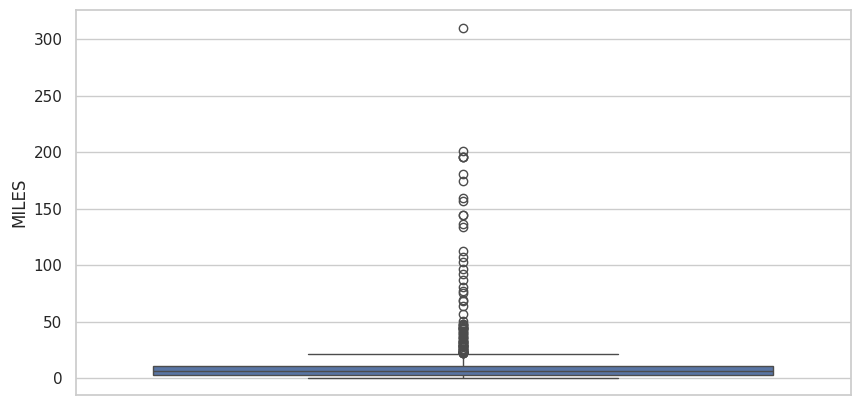

In [83]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

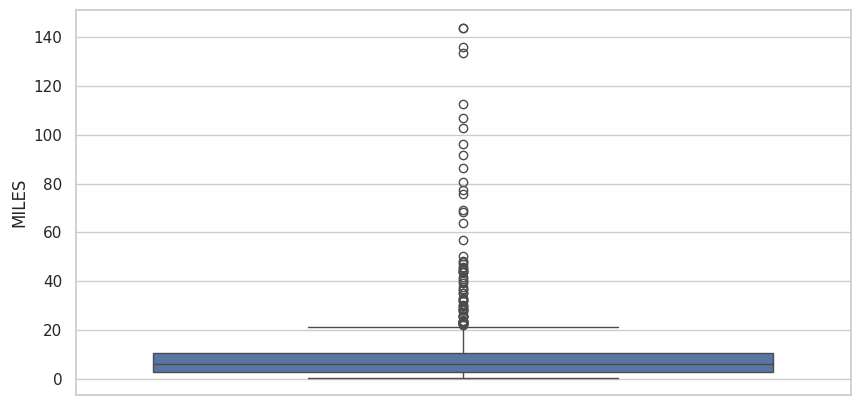

In [84]:
#Step 6: Since there are very few rides having distance> 150 miles, we will focus on datapoints below this range:

sns.boxplot(df[df['MILES']<150]['MILES'])



<ipython-input-85-b028f1bab1a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<100]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

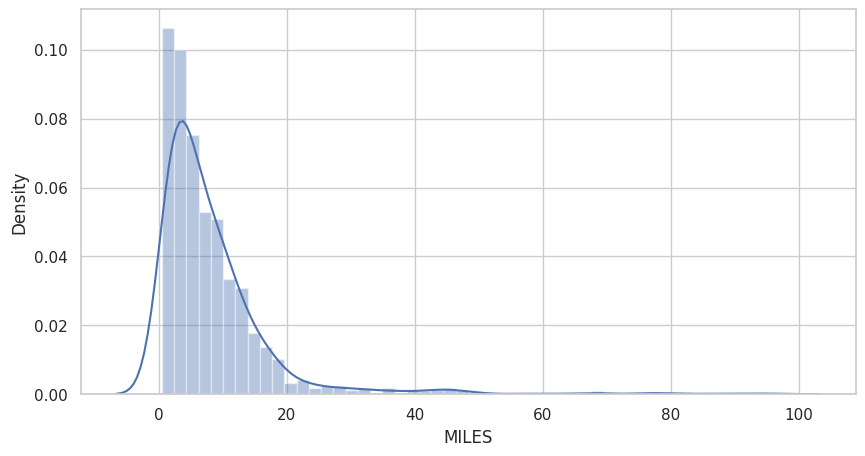

In [85]:
sns.distplot(df[df['MILES']<100]['MILES'])

In [86]:
'''Step 7: creating bins for the distances as follows:
0 to 5 miles - Very Short
5 to 10 miles - Short
10 to 20 miles - Medium
20 to 50 miles - Long
beyond 50 miles- Very Long
'''

df['distance_category'] = pd.cut(x=df['MILES'],bins = [-0.1,5,10,20,50,101],labels = ['Very Short','Short','Medium','Long','Very Long'])
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,day-night,distance_category
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Short
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Early morning,Very Short
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Very Short
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Very Short
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Very Long
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening,Very Short
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17.0,Evening,Short
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13.0,Afternoon,Very Short
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8.0,Morning,Short
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12.0,Afternoon,Medium


In [87]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Purpose of rides
purpose_counts = df['PURPOSE'].value_counts()

# 2. Time of day most rides
time_of_day_counts = df['day-night'].value_counts().sort_index()

# 3. Days of the week
df['DayOfWeek'] = df['START_DATE'].dt.day_name()
day_counts = df['DayOfWeek'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 4. Months
df['Month'] = df['START_DATE'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['Month'].value_counts().reindex(month_order)

# 5. Time of day most rides
distance_split_counts = df['distance_category'].value_counts().sort_index()


Data Visualization & Analysis


<ipython-input-88-8a8733f924c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=purpose_counts.index, ax=axes[0, 0],palette="RdPu")
<ipython-input-88-8a8733f924c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, ax=axes[0, 1], palette="RdPu")
<ipython-input-88-8a8733f924c1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[1, 0],palette="BuPu")
<ipython-input-88-8a8733f924c1>:21: FutureWarning: 

Passing `pal

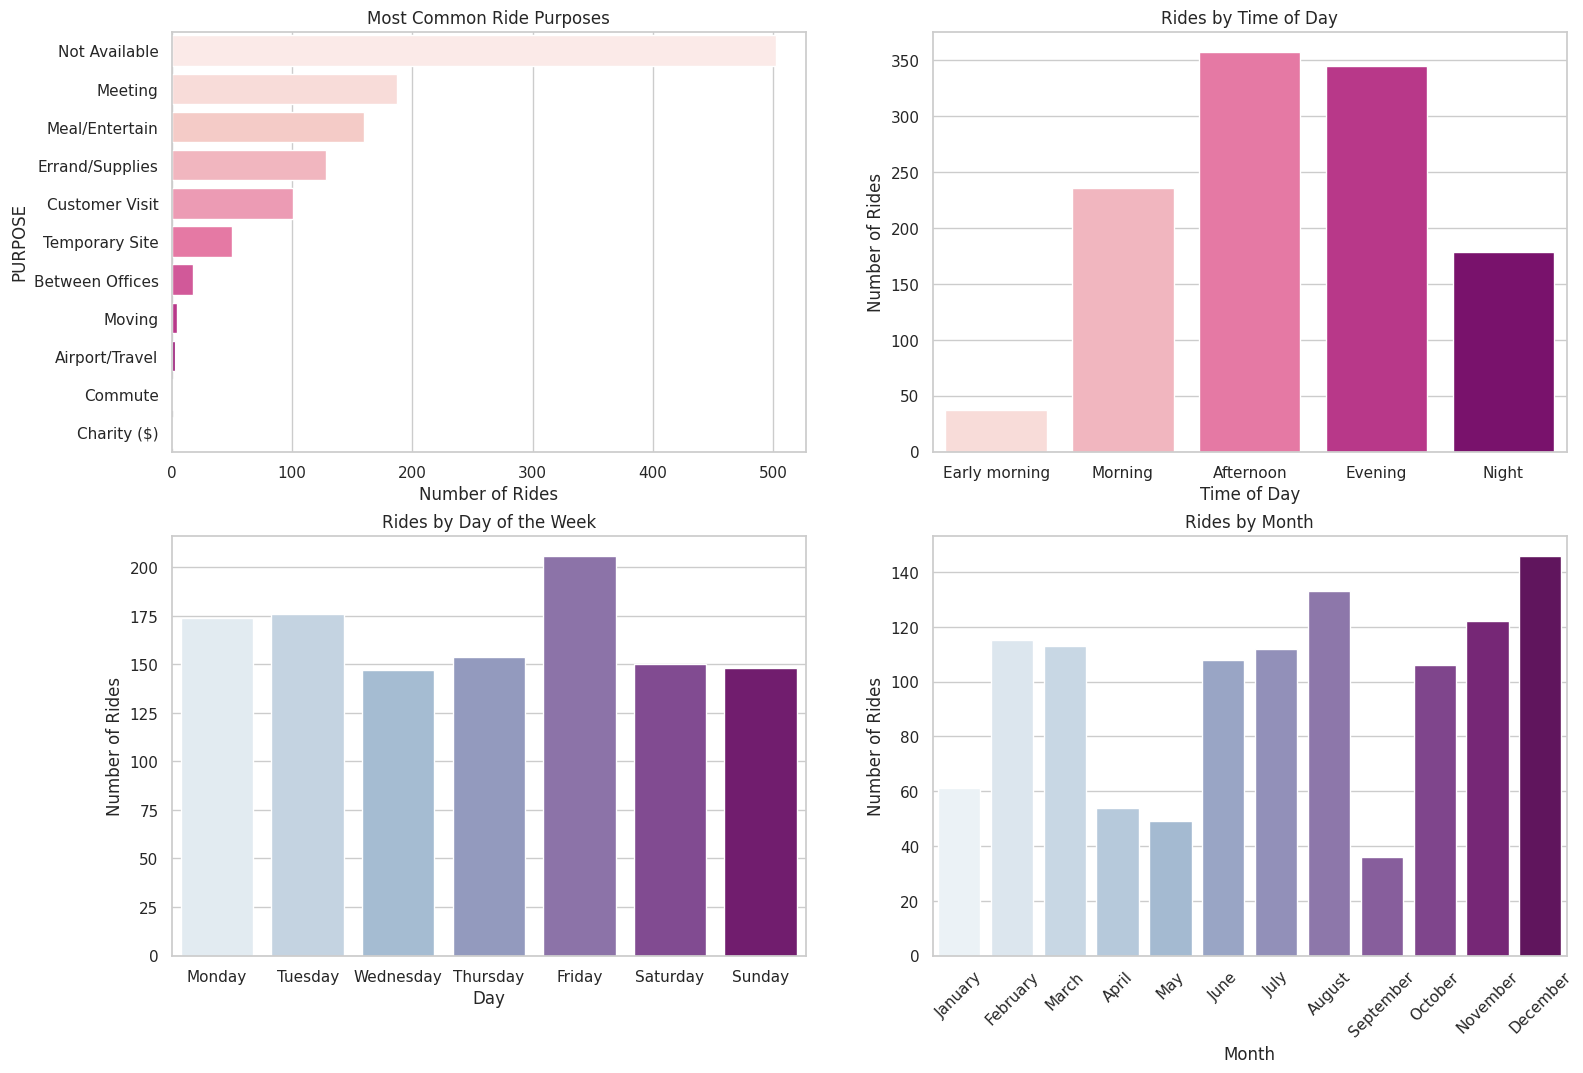

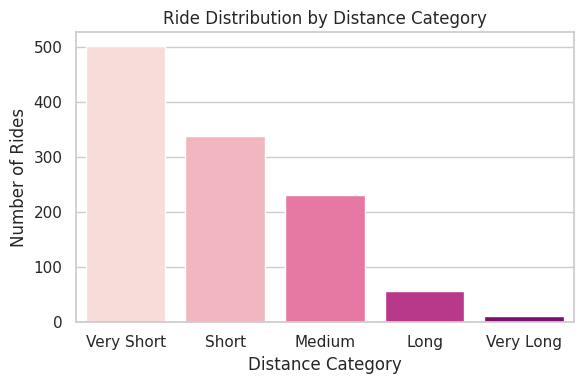

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# 1. Ride Purpose
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, ax=axes[0, 0],palette="RdPu")
axes[0, 0].set_title('Most Common Ride Purposes')
axes[0, 0].set_xlabel('Number of Rides')

#2. Time of Day
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, ax=axes[0, 1], palette="RdPu")
axes[0, 1].set_title('Rides by Time of Day')
axes[0, 1].set_ylabel('Number of Rides')
axes[0, 1].set_xlabel('Time of Day')

# 3. Day of the Week
sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[1, 0],palette="BuPu")
axes[1, 0].set_title('Rides by Day of the Week')
axes[1, 0].set_ylabel('Number of Rides')
axes[1, 0].set_xlabel('Day')

# 4. Month
sns.barplot(x=month_counts.index, y=month_counts.values, ax=axes[1, 1], palette="BuPu")
axes[1, 1].set_title('Rides by Month')
axes[1, 1].set_ylabel('Number of Rides')
axes[1, 1].set_xlabel('Month')
axes[1, 1].tick_params(axis='x', rotation=45)

#5. Distance
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=distance_split_counts.index, y=distance_split_counts.values,palette="RdPu")
plt.title('Ride Distribution by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()


# **Answers to the Business Questions:**




1.   Most rides are booked for meeting purposes, suggesting a professional or business-oriented user segment.
2.   Afternoon to Evening (11 AM to 7 PM) sees the highest ride volume, likely aligning with office hours, lunch meetings, or commute back from meetings.
3.   Friday leads in ride bookings, followed by Tuesday and Monday, hinting at workweek beginning and end activities, or hybrid work schedules.
4.   December and August are peak months. December may reflect year-end events, holiday shopping, and social gatherings. August could indicate back-to-work movement or pre-fall transitions.
5.   Generally, rides are booked for very short distances (<5 miles) indicating urban commuting.




